# TRAVAUX PRATIQUES GROUPE 6 K-MEANS: Prédiction du cancer de sein

# 1- Formulation d'une solution 
&emsp;&emsp;Pour aborder ce problème de classification sur le cancer du sein, l'utilisation d'un modèle basé sur l'algorithme K-means pourrait être envisagée pour assigner efficacement les patients aux catégories de témoins sains ou de patientes atteintes de cancer du sein, en se basant sur leurs caractéristiques cliniques.

# 2- Collecte des données
&emsp;&emsp;Nous avons recueilli le dataset sur kaggle: https://www.kaggle.com/datasets/tanshihjen/coimbra-breastcancer/data
    
&emsp;&emsp;Cet ensemble de données présente une exploration complète des caractéristiques cliniques observées ou mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. L'ensemble de données comprend à la fois des attributs quantitatifs et des étiquettes correspondantes pour une analyse et une modélisation efficaces.

**Attributs quantitatifs :**

- **Âge (années):** Âge des individus.
- **IMC (kg/m²):** Indice de masse corporelle, une mesure de la graisse corporelle basée sur le poids et la taille.
- **Glucose (mg/dL):** Glycémie, un indicateur métabolique important.
- **Insuline (µU/mL):** Taux d'insuline, une hormone liée à la régulation du glucose.
- **HOMA:** Homeostatic Model Assessment, une méthode d’évaluation de la résistance à l’insuline et de la fonction des cellules bêta.
- **Leptine (ng/mL):** Taux de leptine, une hormone impliquée dans la régulation de l'appétit et de l'équilibre énergétique.
- **Adiponectine (µg/mL):** Taux d'adiponectine, une protéine associée à la régulation métabolique.
- **Résistine (ng/mL):** Niveaux de résistine, une protéine impliquée dans la résistance à l'insuline.
- **MCP-1 (pg/dL):** Monocyte Chemoattractant Protein-1, une cytokine impliquée dans l'inflammation.

**Étiquettes:**

- **1 :** Témoins sains
- **2 :** Patientes atteintes d’un cancer du sein



# 3-Prétraitement des données 
## Importation des bibliothèques


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#from kneed import KneeLocator 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Chargement du dataset
data=pd.read_csv('Coimbra_breast_cancer_dataset.csv')

In [38]:
# Ouverture du dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [39]:
#Exploration des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [40]:
print(data.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

<AxesSubplot:>

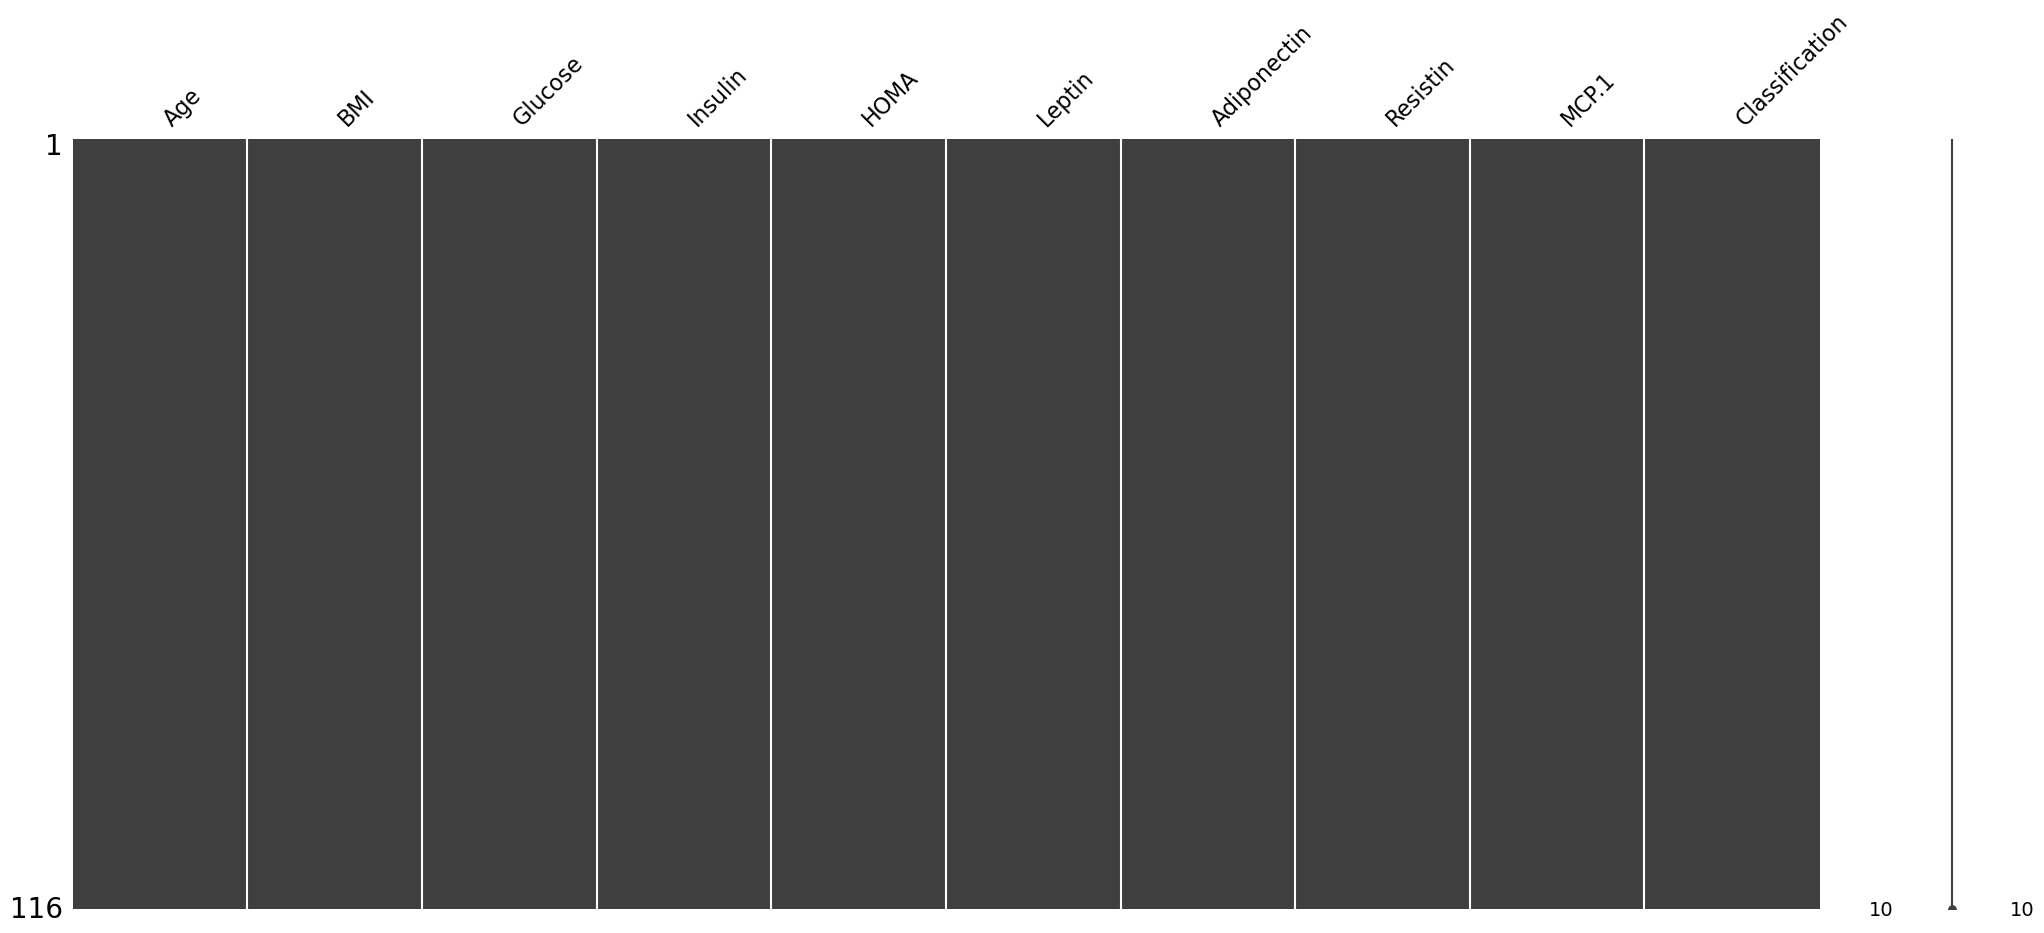

In [41]:
# Visualisation des valeurs manquantes
msno.matrix(data)

In [42]:
# Supprimer les duplications
data = data.drop_duplicates()

# Supprimer les colonnes avec des valeurs manquantes
data = data.dropna(axis=1)


NameError: name 'sns' is not defined

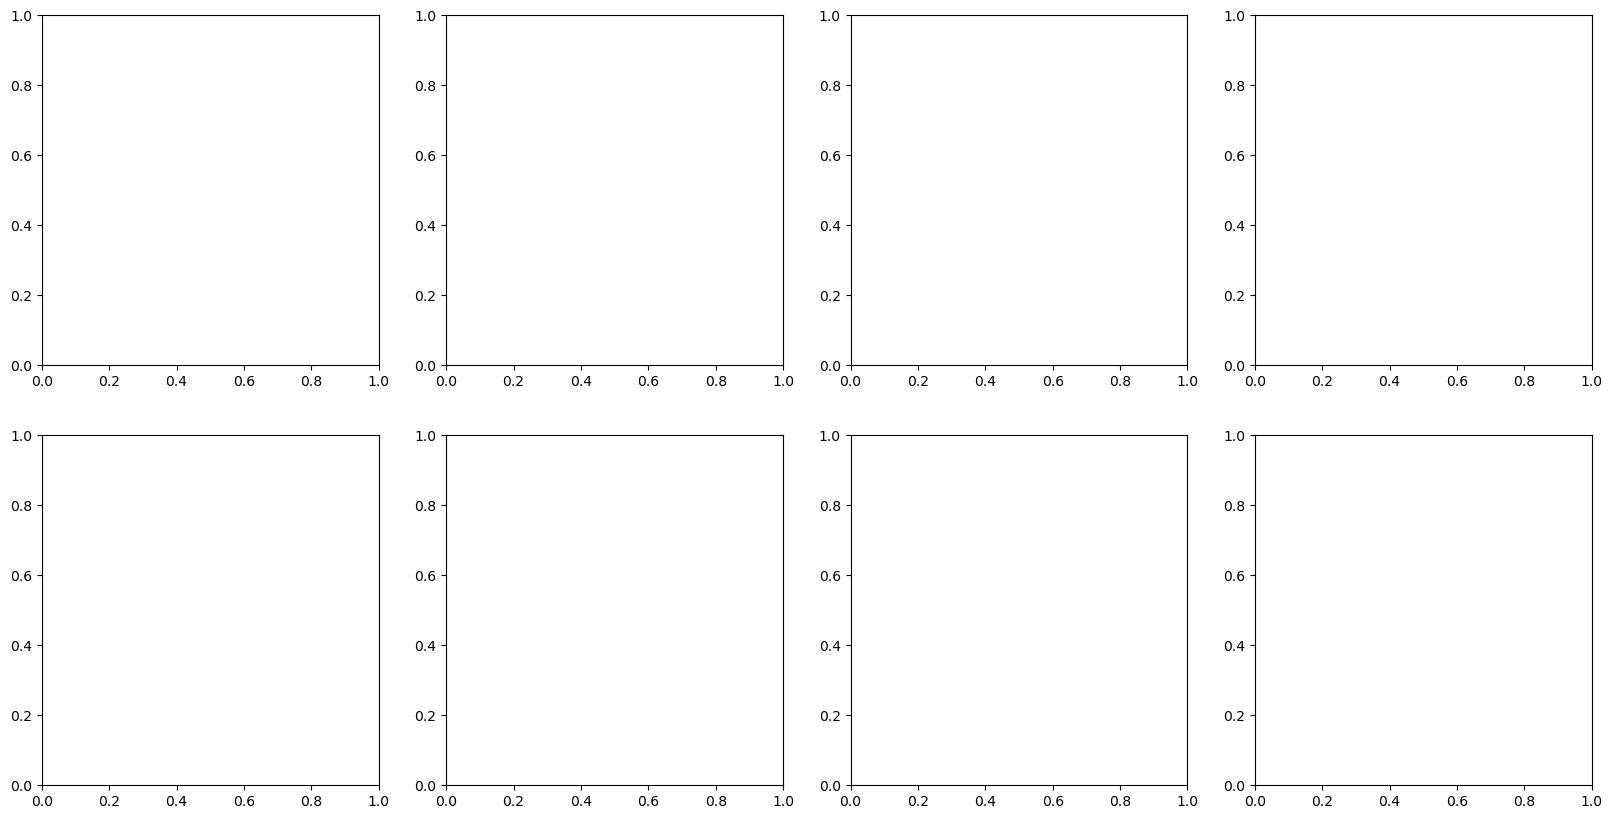

In [43]:
import numpy as np
from scipy.stats import norm

# Examinez la distribution des variables continues avec la courbe de la loi normale
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, variable in enumerate(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin']):
    sns.histplot(data[variable], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogramme de {variable}')
plt.tight_layout()
plt.show()


## class kmeans

In [44]:
class KMeans:
    """
    Implémentation de l'algorithme de clustering K-Means.

    Paramètres:
        K (int): Nombre de clusters

    Attributs:
        K (int): Nombre de clusters
        centroids (numpy.ndarray): Tableau contenant les centroids de chaque cluster

    Méthodes:
        __init__(self, K): Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        initialize_centroids(self): Initialise les centroids pour chaque cluster en sélectionnant K points aléatoires du jeu de données.
        assign_points_centroids(self): Assignent chaque point du jeu de données au centroid le plus proche.
        compute_mean(self, data, points): Calcule la moyenne des points assignés à chaque centroid.
        fit(self, data, iterations=10): Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        elbow(self, data, max_clusters=10): Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        plot_clusters(self, data, assigned_points): Affiche le jeu de données avec les clusters assignés.
        evaluation(self, data, assigned_points): Évalue la performance du modèle en utilisant des métriques appropriées.
        inertia(self, data, assigned_points): Calcule l'inertie (somme des carrés des distances intra-cluster).

    """
    def __init__(self,data, num_clusters=3, max_iterations=100, plot_figure=True):

        """
        Initialise l'instance Kmeans avec le nombre spécifié de clusters.

        Paramètres:
            num_clusters (int): Nombre de clusters, 
            max_iterations (int): Nombre de clusters, 
            plot_figure (int): Nombre de clusters, 

        """
        self.num_clusters = num_clusters  # Nombre de clusters
        self.max_iterations = max_iterations  # Nombre maximum d'itérations pour éviter les boucles infinies
        self.plot_figure = plot_figure  # Indique s'il faut tracer la figure
        self.data = np.array(data)
        self.centroids = self.initialize_centroids()
        self.cluster_assignments = None

    def initialize_centroids(self):
        """
        Initialise les centroids pour chaque cluster en sélectionnant K points aléatoires du jeu de données.

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
        Retourne:
            numpy.ndarray: Tableau contenant l'indice du centroid pour chaque point
        """
        # Initialiser les centroïdes de manière aléatoire
        indices = np.random.choice(len(self.data), self.num_clusters, replace=False)
        return self.data[indices]
    
    def find_nearest_centroid(self, point):
        # Trouver l'indice du centroïde le plus proche pour un point donné
        distances = np.linalg.norm(self.centroids - point, axis=1)
        return np.argmin(distances)
    # methode qui calcule la distance euclidienne
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

    def assign_points_centroids(self, centroids):
        
        self.X = data.iloc[:, [0, 9]]  # Selection des features
        self.m = self.X.shape[0]  # noumbre d'exemples pour le test
        old_centroids  = np.zeros(centroids.shape)
        stopping_c= 0.0001 #Critere d'arret de la boucle while quand le centroid et le point se confondent

        # Assignent chaque point du jeu de données au centroid le plus proche.

        while self.euclidean_distance(old_centroids, centroids) > stopping_c:
            clusters = np.zeros(len(self.X))
            # Affectation de chaque valeur au cluster le plus proche
            for i in range(self.m):
                distances = []
                for j in range(len(centroids)):
                    distances.append(self.euclidean_distance(self.X.iloc[i, :], centroids[j]))
                cluster = np.argmin(distances)
                clusters[i] = cluster
        
        """
        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser

        Retourne:
            numpy.ndarray: Tableau contenant l'indice du centroid pour chaque point
        """
        

    def compute_mean(self):
        """
        Calcule la moyenne des points assignés à chaque centroid.

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            numpy.ndarray: Tableau contenant les nouveaux centroids pour chaque cluster
        """
        result=[]
        for c in data:
            saved=[]
            for p in points:
                saved.append((c.x-p.x)/2+(c.y-p.y)/2)
            result.append(np.mean(saved))
        return result
        

    def fit(self,max_iterations=None):
        """
        Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            iterations (int): Nombre d'itérations à effectuer (par défaut=10)

        Retourne:
            numpy.ndarray: Tableau contenant les centroids finaux pour chaque cluster
            numpy.ndarray: Tableau contenant l'indice du centroid pour chaque point
        """
        if max_iterations is None:
            max_iterations = self.max_iterations
        for iteration in range(self.max_iterations):
            # Affecter chaque point au centroïde le plus proche
            self.cluster_assignments = np.array([self.find_nearest_centroid(point) for point in self.data])

            # Mettre à jour les centroïdes en calculant la moyenne des points attribués à chaque cluster
            for cluster in range(self.num_clusters):
                points_in_cluster = self.data[self.cluster_assignments == cluster]
                if len(points_in_cluster) > 0:
                    self.centroids[cluster] = np.mean(points_in_cluster, axis=0)

    @staticmethod
    def elbow(data, max_clusters=10):
        """
        Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        Utilise la libraire kneed pour recuperer cette valeur 

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            max_clusters (int): Nombre maximal de clusters à considérer (par défaut=10)

        Retourne:
            List: Liste des inerties intra-cluster pour chaque nombre de clusters testé
        """
        

    def plot_clusters(self):
        """
        Affiche le jeu de données avec les clusters assignés.

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point
        """
        

    def evaluation(self, data, assigned_points):
        """
        Évalue la performance du modèle en utilisant des métriques appropriées.

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Score d'évaluation
        """
        

    def inertia(self, data, assigned_points):
        """
        Calcule l'inertie (somme des carrés des distances intra-cluster).

        Paramètres:
            data (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Valeur de l'inertie
        """
        


In [45]:
""" 

    Test fonction fit

"""
# Exemple d'utilisation
data_points = [[1, 2], [5, 8], [3, 4], [8, 7], [2, 6], [7, 3]]

kmeans = KMeans(data=data_points, plot_figure=True)
kmeans.fit(max_iterations=100)
# Afficher les résultats
print("Centroides finaux :", kmeans.centroids)
print("Affectation des points :", kmeans.cluster_assignments)

Centroides finaux : [[7 3]
 [6 7]
 [2 4]]
Affectation des points : [2 1 2 1 2 0]


# séparation des données test et d'entrainement

In [46]:
from sklearn.model_selection import train_test_split

#Selection des variable pertinents
X = data[['Classification', 'Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']]
#Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


# Séparer les données en ensembles d'entraînement (20) et de test (20)
train_data, test_data = train_test_split(X_scaled, test_size=20, train_size=20, random_state=42)
from sklearn.cluster import KMeans

# Afficher les tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", len(train_data))
print("Taille de l'ensemble de test :", len(test_data))


[[-1.10940039 -0.57979363 -0.81667527 ... -0.07022151 -0.54551749
  -0.34125061]
 [-1.10940039  1.60182096 -1.37875056 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [-1.10940039  1.53948912 -0.89176446 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.90138782  0.47984774  0.89385486 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.90138782  0.91617066 -0.39854568 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 0.90138782  1.7888165  -0.0804471  ...  0.57664406 -0.84103616
  -1.29074683]]
Taille de l'ensemble d'entraînement : 20
Taille de l'ensemble de test : 20


In [47]:
#taille des données d'entrainement
train_data.shape

(20, 10)

In [48]:
#taille des données de test
test_data.shape

(20, 10)

# Elbow model

**Nous presenterons ici la methode Elbow permettant de trouver le nombre maximal de cluster**

**Voici les étapes générales de la méthode du coude :**

1. *Choisir le nombre de clusters :* Commencez par sélectionner une plage de valeurs pour le nombre de clusters que vous souhaitez tester. Cela peut aller de 1 à un certain nombre maximum raisonnable.

2. *Appliquer l'algorithme de clustering :* Utilisez un algorithme de clustering comme K-means pour diviser vos données en un nombre variable de clusters en fonction des valeurs que vous avez choisies à l'étape précédente.

3. *Calculer la somme des carrés des distances :* Pour chaque valeur de clusters, calculez la somme des carrés des distances entre chaque point de données et le centre de son cluster. Cette mesure est souvent appelée l'inertie intra-cluster.

4. *Représenter graphiquement :* Tracez un graphique montrant le nombre de clusters sur l'axe des x et l'inertie intra-cluster sur l'axe des y. Vous verrez généralement une courbe qui ressemble à un "coude".

5. *Trouver le coude :* Recherchez le point où l'inertie intra-cluster commence à diminuer de manière significativement plus lente. Ce point est souvent appelé le "coude" et correspond au nombre optimal de clusters.

Le choix du nombre de clusters dépend souvent de l'équilibre entre la réduction de l'inertie intra-cluster (ce que nous voulons maximiser) et la complexité du modèle (ce que nous voulons minimiser).


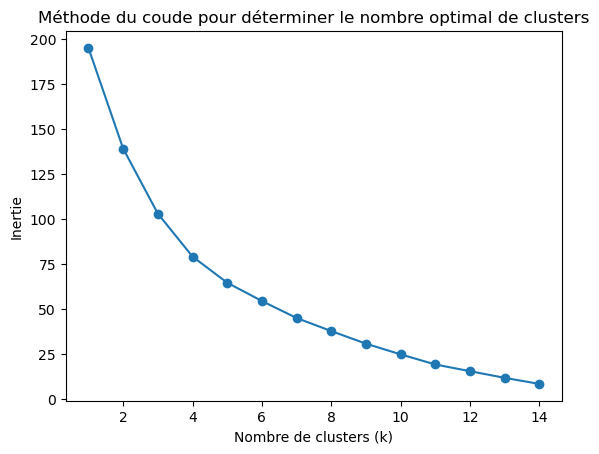

In [49]:
# Liste pour stocker l'inertie pour différentes valeurs de k
inertia_values = []

# Tester différentes valeurs de k
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia_values.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 15), inertia_values, marker='o')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

# Nous voyons clairement qu'il ya le coude au niveau 4 d'ou le nombre de cluster est k=4 